<h1 style="color: #8b5e3c;">Bucks Dataset Data Visualization</h1>
In this Jupyter Notebook, we look at all the Bucks Datasets that we have as well as the new ones we've created. The aim is to create data visualizations that will help us with understanding the relationships between features and uncover any insights.

<h3 style="color: #8b5e3c"> Determining Features of Interest in `AccountLevel`</h3>
We start off by looking at the features in the AccountLevel dataset, and seeing what features might be important to us, and then determining if the relationships between those features would lead us to deriving an answer for the business question. We begin my importing the datasets.

In [2]:
# importing the pandas library and IPython display
import pandas as pd
from IPython.display import display

# importing the account data frame
account_df = pd.read_csv("C:/GitHub/BucksHackathon25/BucksBusinessObjectives/BucksDatasets/AccountLevel.csv")

# viewing the data frame
display(account_df)

,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement
0,2023,1,0,0,0,0,467.00,0,F,12.0,872.0,Low
1,2023,2,2,0,0,0,116.00,1,A,47.0,485.0,Low
2,2023,3,3,0,0,0,107.00,1,B,6.0,896.0,Low
3,2023,4,0,0,3,0,27.00,1,C,3.0,467.0,High
4,2023,5,0,0,2,0,14.00,1,A,4.0,582.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
44206,2024,43025,2,0,0,0,2.00,1,A,26.0,290.0,High
44207,2024,43026,0,0,3,0,6.34,1,D,6.0,266.0,Medium
44208,2024,43027,0,0,6,0,41.00,1,Limited Data,9.0,392.0,High
44209,2024,43028,2,0,0,0,68.00,1,A,6.0,898.0,High


In [19]:
# displaying the statistics and information of the dataset
display(account_df.info())
display((account_df.describe()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44211 entries, 0 to 44210
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season                 44211 non-null  int64  
 1   AccountNumber          44211 non-null  int64  
 2   SingleGameTickets      44211 non-null  int64  
 3   PartialPlanTickets     44211 non-null  int64  
 4   GroupTickets           44211 non-null  int64  
 5   STM                    44211 non-null  int64  
 6   AvgSpend               44211 non-null  float64
 7   GamesAttended          44211 non-null  int64  
 8   FanSegment             44211 non-null  object 
 9   DistanceToArena        41088 non-null  float64
 10  BasketballPropensity   37214 non-null  float64
 11  SocialMediaEngagement  44211 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 4.0+ MB


None

,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,DistanceToArena,BasketballPropensity
count,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,41088.000000,37214.000000
mean,2023.645631,21116.251815,1.987582,0.836082,2.476669,0.049648,81.139832,1.262966,143.870668,689.229027
std,0.478327,12508.767388,15.080973,5.177241,178.657845,0.217220,94.742229,2.323687,329.215154,235.621148
min,2023.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000
25%,2023.000000,10169.500000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,8.000000,481.000000
50%,2024.000000,20923.000000,2.000000,0.000000,0.000000,0.000000,62.000000,1.000000,30.000000,719.000000
75%,2024.000000,31975.500000,3.000000,0.000000,0.000000,0.000000,100.000000,1.000000,87.000000,923.000000
max,2024.000000,43028.000000,3120.000000,120.000000,37200.000000,1.000000,3297.000000,41.000000,4240.000000,993.000000


<h3 style="color: #8b5e3c"> Average Spending vs FanSegment </h3>
We would like to start our visualization by comparing the average spending against the fan segment. We would like to see the number of outliers. The reasoning is that we would like to know if we need to adjust the IQR for when we start plotting.

In [15]:
# importing the matplotlib library
import matplotlib.pyplot as plt

# importing the seaborn
import seaborn as sns

# defining the quartiles
Q1 = account_df['AvgSpend'].quantile(0.25)
Q3 = account_df['AvgSpend'].quantile(0.75)
interquartile_range = Q3 - Q1

# defining the lower and upper bounds
lower_bound = Q1 - (1.5 * interquartile_range)
upper_bound = Q3 + (1.5 * interquartile_range)

In [18]:
# setting up a outlier count
outlier_counts = {}

# counting all the outlier data points 
for segment, group in account_df.groupby('FanSegment'):
    outlier_count = 0
    for value in group['AvgSpend']:
        if value < lower_bound or value > upper_bound:
            outlier_count = outlier_count + 1
    outlier_counts[segment] = round((outlier_count / len(group)) * 100, 2)

# printing out the number of outliers
print("Percentage of Outliers: ", outlier_counts)

Percentage of Outliers:  {'A': 4.31, 'B': 5.12, 'C': 5.53, 'D': 4.66, 'E': 8.44, 'F': 7.88, 'G': 25.08, 'Limited Data': 5.25}


<h3 style="color: #8b5e3c"> Function for the Violin Plot </h3>
Before we plot out the violin plots, we define a function that is designed to plot out a box plot. This will help remove code is that too repetitive and will help reduce the size of the cells that are meant for graphing out box plots.

In [56]:
# importing the sns library
import seaborn as sns

# function for graphing out a box plot
def graph_violin_plot(fan_segment, y_axis_title, dataset, ax):
    sns.violinplot(y = y_axis_title, data=dataset, color='#00471B', ax=ax)
    ax.set_title(f"Average Spending Distribution for Segment {fan_segment}")
    ax.set_ylabel(y_axis_title)

<h3 style="color: #8b5e3c"> Visualizing the Average Spending vs Fan Segment of Bucks Fans </h3>
Now that we made the function, we now make a box plot for looking at the average spending and fan segments of Bucks Fans. Since we're comparing a categorical variable against a numerical variable, we decided to opt for a box plot to visualize the results. Here is the visualization as such.

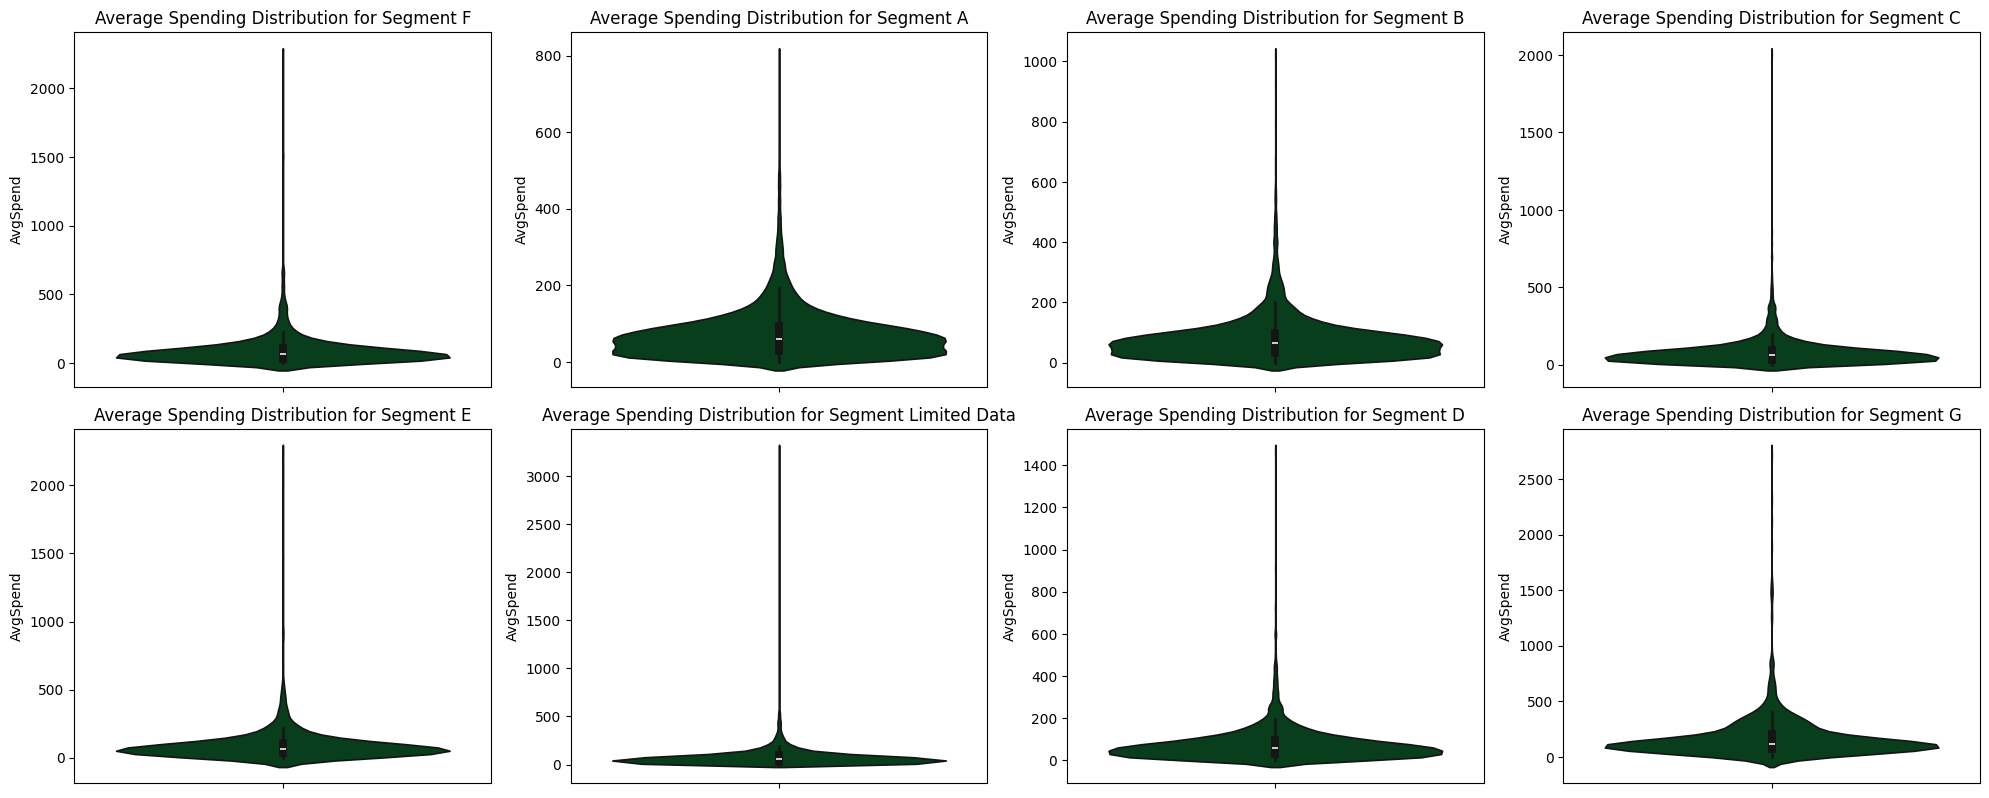

In [57]:
# finding unique value of the fan segments
fan_segments = account_df['FanSegment'].unique()

# setting the number of rows and columns
rows = 3
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 12)) 

# flatten the axes array
axes = axes.ravel()  

# using a for loop to greate the graph
for i, segment in enumerate(fan_segments):
    if i < len(axes):  
        segment_df = account_df[account_df['FanSegment'] == segment]
        graph_violin_plot(segment, "AvgSpend", segment_df, axes[i])

for j in range(len(fan_segments), len(axes)):
    fig.delaxes(axes[j])

# displaying the plots
plt.tight_layout()

# displaying the plot
plt.show()